In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [275]:
def cleanse(df):
    """
        This function takes a DataFrame, 
        cleans or prepares it and returns it 
        for further analysis
    """
    
    # Removing duplicate data
    df = df.drop_duplicates()
    
    # Dropping empty columns
    for col in df.columns:
        if df[col].isna().all():
            df.dropna()
            
    return df

In [276]:
sales = pd.read_csv("csv/walmart_sales.csv", index_col = 0)

print(sales.size)

sales = cleanse(sales)

sales = sales.reset_index()

print(sales.size)

print(type(sales["Date"][0]))

sales

sales.describe()

45045
51480
<class 'str'>


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [277]:
print(type(sales.Temperature[0]))
sales.head()

<class 'numpy.float64'>


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [278]:
sales["Temperature"] = sales["Temperature"].astype(float)

In [279]:
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [280]:
sales.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [281]:
sales.corr(method = "pearson", numeric_only = True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [282]:
sales.Date = sales.Date.astype('datetime64[D]')

sales.Date

C:\Users\va23abb\AppData\Local\Temp\ipykernel_6000\721366028.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales.Date = sales.Date.astype('datetime64[D]')


0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [283]:
sales.tail()

# sales.dtypes

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [284]:
# sales.pivot_table("Weekly_Sales", index = sales.index, columns = "Store", aggfunc = sum)

In [285]:
# plt.figure(dpi = 144)

# x = sales.Date
# y = sales.Weekly_Sales

# plt.xlabel("Date")
# plt.ylabel("Sales")

# plt.grid(visible = True)
# plt.bar(x, y)

# # plt.legend(loc = "upper right")

# plt.show()

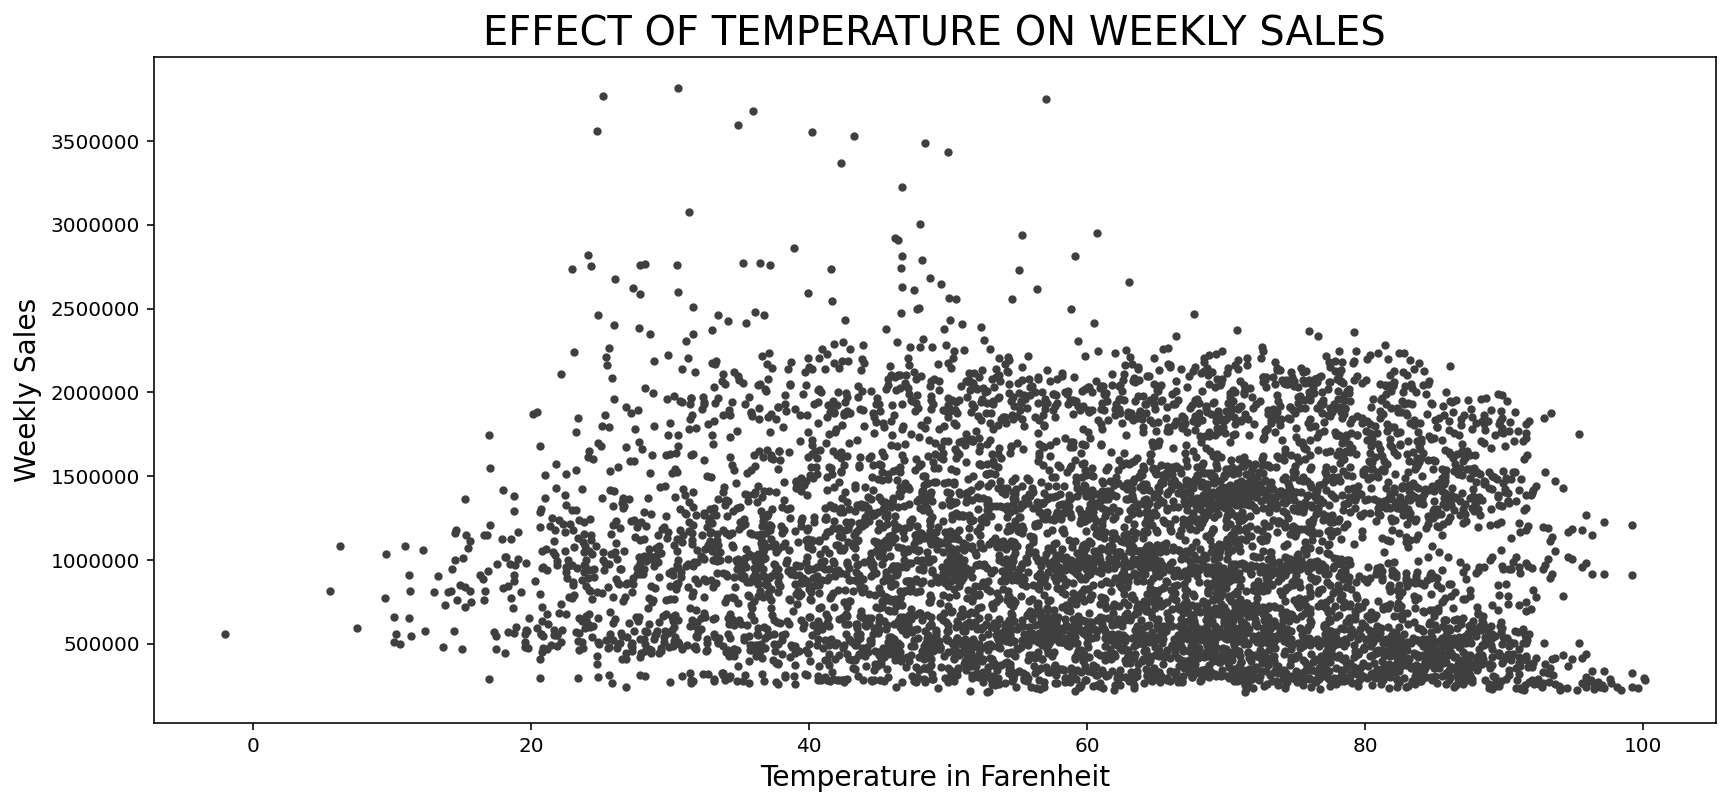

In [286]:
plt.figure(figsize = (14, 6), dpi = 144)

x = sales.Temperature
y = sales.Weekly_Sales

# sns.scatterplot(data = sales, x = "Temperature", y = "Weekly_Sales", color = "#3f3f3f", edgecolor = '#a5a5a5')
plt.scatter(x, y, c = "#3f3f3f", s = 10)

plt.title("EFFECT OF TEMPERATURE ON WEEKLY SALES", fontdict = {"size": 20})

plt.xlabel("Temperature in Farenheit", fontdict = {"size": 14, "color" : "#000"})  
plt.ylabel("Weekly Sales", fontdict = {"size": 14, "color" : "#000"})

plt.ticklabel_format(style='plain')

plt.show()

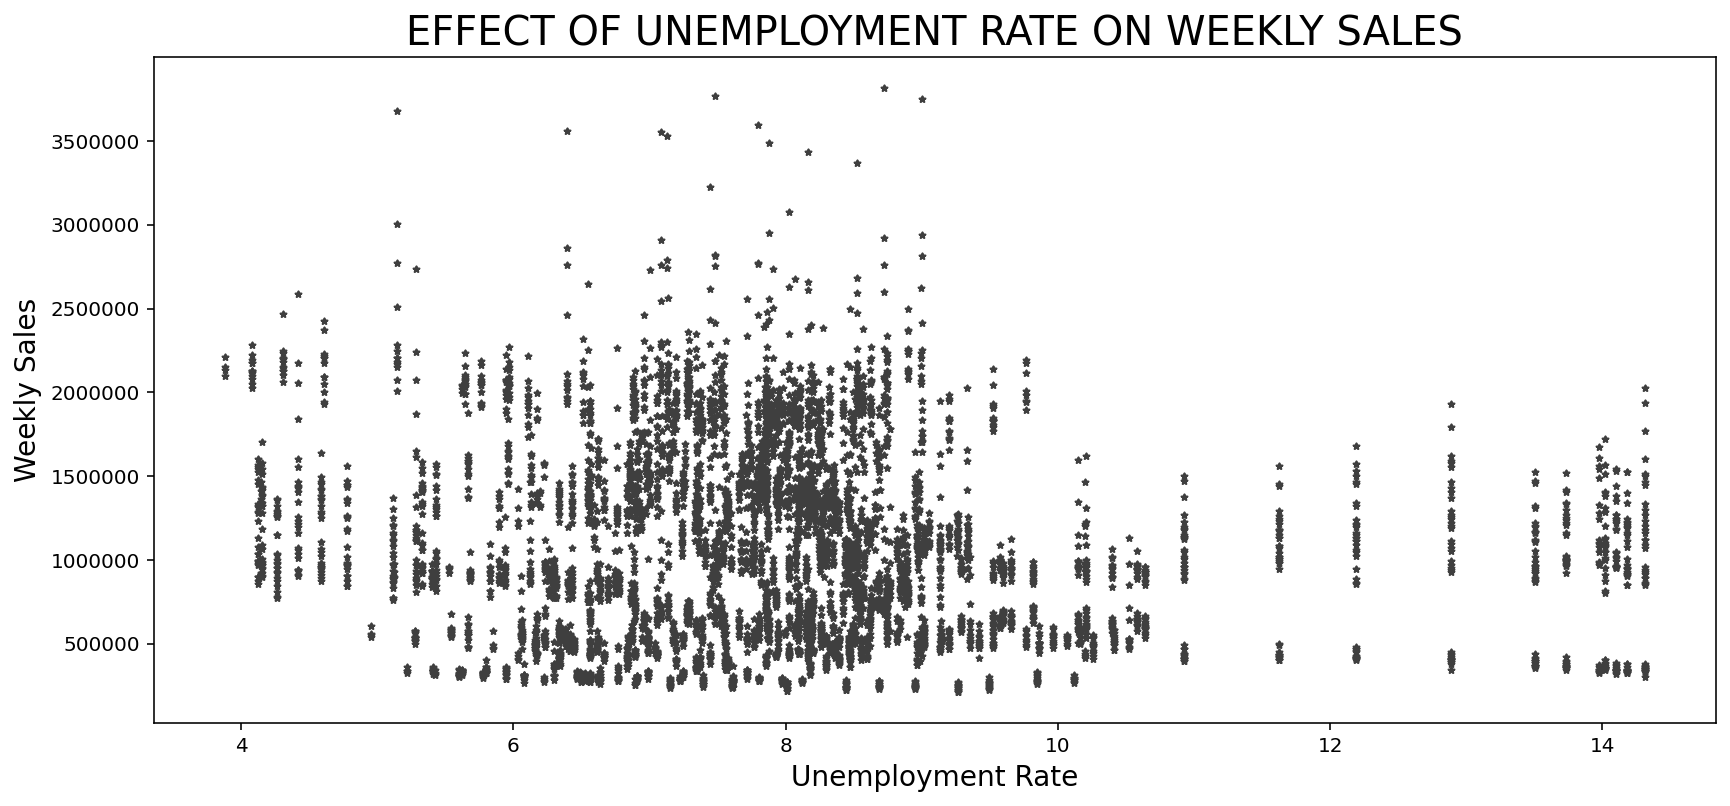

In [287]:
plt.figure(figsize = (14, 6), dpi = 144)

x = sales.Unemployment
y = sales.Weekly_Sales

# sns.scatterplot(data = sales, x = "Temperature", y = "Weekly_Sales", color = "#3f3f3f", edgecolor = '#a5a5a5')
plt.scatter(x, y, c = "#3f3f3f", s = 10, marker = "*")

plt.title("EFFECT OF UNEMPLOYMENT RATE ON WEEKLY SALES", fontdict = {"size": 20})

plt.xlabel("Unemployment Rate", fontdict = {"size": 14, "color" : "#000"})  
plt.ylabel("Weekly Sales", fontdict = {"size": 14, "color" : "#000"})

plt.ticklabel_format(style='plain')

plt.show()

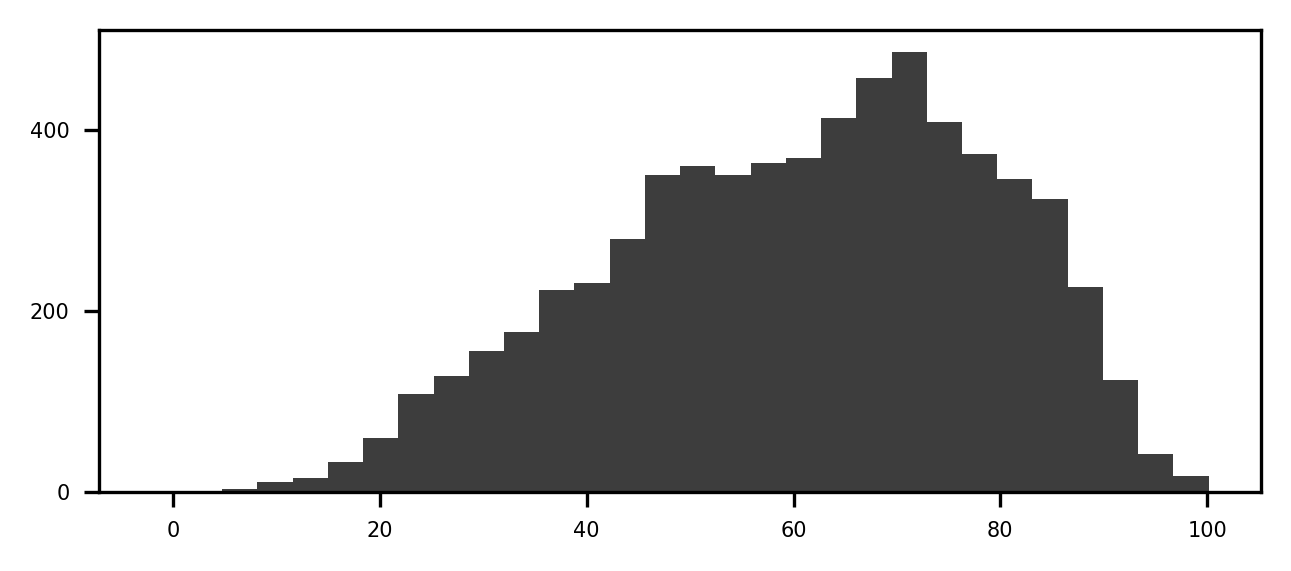

In [288]:
plt.figure(figsize = (5, 2), dpi = 300)

x = sales.Temperature

plt.hist(x, bins = 30, color = "#3d3d3d")

plt.xticks(size = 5)
plt.yticks(size = 5)

plt.show()

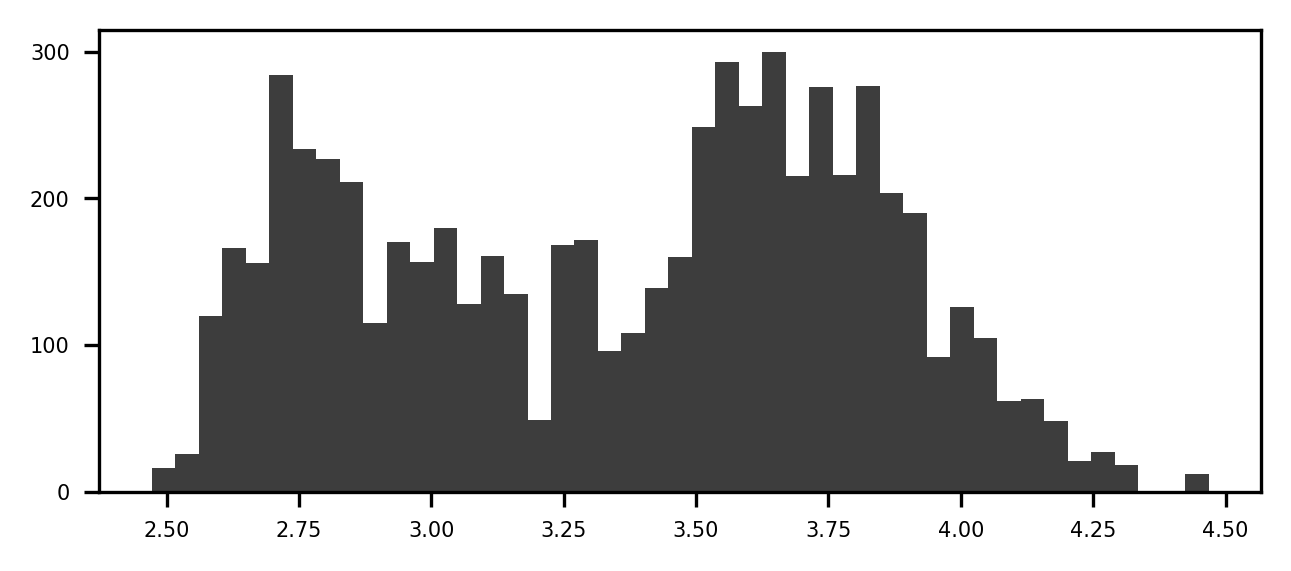

In [289]:
plt.figure(figsize = (5, 2), dpi = 300)

x = sales.Fuel_Price

plt.hist(x, bins = 45, color = "#3d3d3d")

plt.xticks(size = 5)
plt.yticks(size = 5)

plt.show()

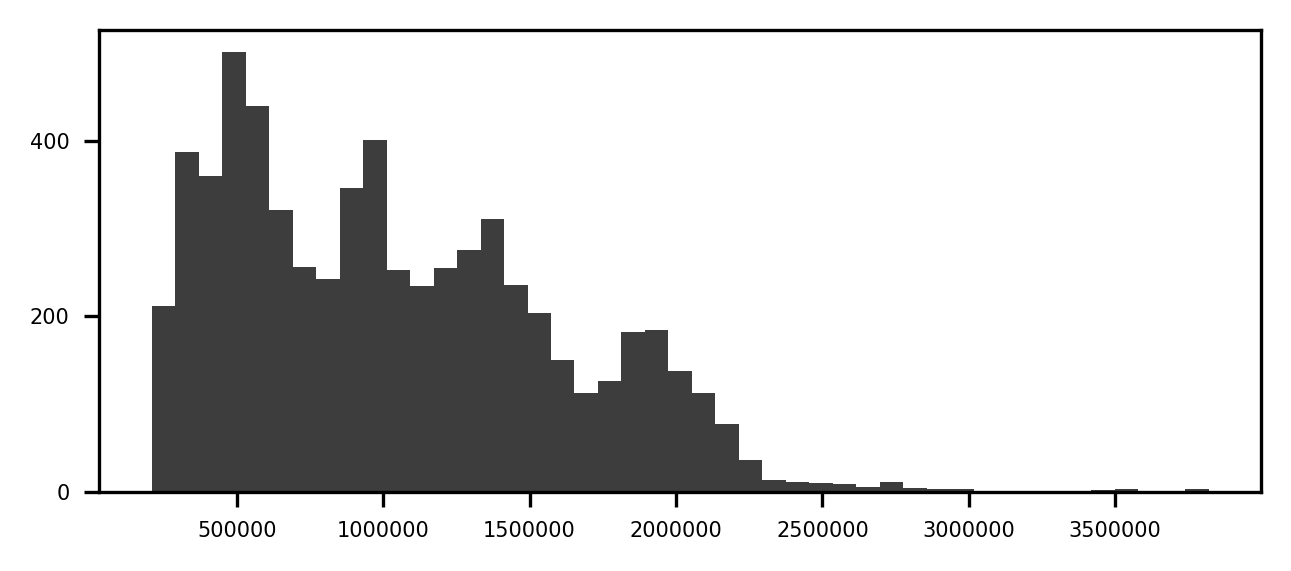

In [290]:
plt.figure(figsize = (5, 2), dpi = 300)

x = sales.Weekly_Sales

plt.hist(x, bins = 45, color = "#3d3d3d")

plt.xticks(size = 5)
plt.yticks(size = 5)

plt.ticklabel_format(style = "plain")

plt.show()

In [305]:
# # generating 2-D 10x10 matrix of random numbers
# # from 1 to 100
# data = np.random.randint(low=1,
#                          high=100,
#                          size=(10, 10))
   
# # plotting the heatmap
# hm = sns.heatmap(data=data,
#                 annot=True)
   
# # displaying the plotted heatmap
# plt.show()

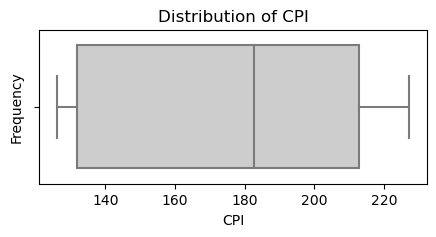

In [17]:
# plt.figure(figsize = (5, 2))

# sns.boxplot(data = sales.CPI, x = "sales.CPI", color = 'purple') # Applied Square Root Rule for bins count

# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sales.CPI' is a valid data column
plt.figure(figsize=(5, 2))
sns.boxplot(data = sales.CPI, x = sales.CPI, color='#cdcdcd')
plt.title("Distribution of CPI")
plt.xlabel("CPI")
plt.ylabel("Frequency")
plt.show()
